<a href="https://colab.research.google.com/github/victordot/Inteligencia-Artificial-2025-2/blob/main/01%20-%20exploraci%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"victordocampot","key":"0f8ade079b2df30ff64919a0ea693ea6"}'}

In [2]:
import os
import shutil

# Crear carpeta oculta .kaggle
os.makedirs('/root/.kaggle', exist_ok=True)

source_path = "kaggle.json"
destination_path = "/root/.kaggle/kaggle.json"

if os.path.exists(destination_path):
    os.remove(destination_path)

shutil.move(source_path, destination_path)

# Dar permisos
os.chmod(destination_path, 600)

In [3]:
!kaggle competitions download -c udea-ai-4-eng-20252-pruebas-saber-pro-colombia
!ls -lh


  0% 0.00/29.9M [00:00<?, ?B/s]
100% 29.9M/29.9M [00:00<00:00, 1.35GB/s]
total 30M
drwxr-xr-x 1 root root 4.0K Oct  2 13:36 sample_data
-rw-r--r-- 1 root root  30M Sep 16 01:46 udea-ai-4-eng-20252-pruebas-saber-pro-colombia.zip


In [4]:
import zipfile

with zipfile.ZipFile("udea-ai-4-eng-20252-pruebas-saber-pro-colombia.zip", "r") as zip_ref:
    zip_ref.extractall("dataset_saber_pro")


In [5]:
import pandas as pd

# Cargar el archivo
df = pd.read_csv("dataset_saber_pro/train.csv")

# Vista general
print(df.shape)   # filas y columnas
df.head()


(692500, 21)


,ID,PERIODO_ACADEMICO,E_PRGM_ACADEMICO,E_PRGM_DEPARTAMENTO,E_VALORMATRICULAUNIVERSIDAD,E_HORASSEMANATRABAJA,F_ESTRATOVIVIENDA,F_TIENEINTERNET,F_EDUCACIONPADRE,F_TIENELAVADORA,...,E_PRIVADO_LIBERTAD,E_PAGOMATRICULAPROPIO,F_TIENECOMPUTADOR,F_TIENEINTERNET.1,F_EDUCACIONMADRE,RENDIMIENTO_GLOBAL,INDICADOR_1,INDICADOR_2,INDICADOR_3,INDICADOR_4
0,904256,20212,ENFERMERIA,BOGOTÁ,Entre 5.5 millones y menos de 7 millones,Menos de 10 horas,Estrato 3,Si,Técnica o tecnológica incompleta,Si,...,N,No,Si,Si,Postgrado,medio-alto,0.322,0.208,0.310,0.267
1,645256,20212,DERECHO,ATLANTICO,Entre 2.5 millones y menos de 4 millones,0,Estrato 3,No,Técnica o tecnológica completa,Si,...,N,No,Si,No,Técnica o tecnológica incompleta,bajo,0.311,0.215,0.292,0.264
2,308367,20203,MERCADEO Y PUBLICIDAD,BOGOTÁ,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Si,...,N,No,No,Si,Secundaria (Bachillerato) completa,bajo,0.297,0.214,0.305,0.264
3,470353,20195,ADMINISTRACION DE EMPRESAS,SANTANDER,Entre 4 millones y menos de 5.5 millones,0,Estrato 4,Si,No sabe,Si,...,N,No,Si,Si,Secundaria (Bachillerato) completa,alto,0.485,0.172,0.252,0.190
4,989032,20212,PSICOLOGIA,ANTIOQUIA,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 3,Si,Primaria completa,Si,...,N,No,Si,Si,Primaria completa,medio-bajo,0.316,0.232,0.285,0.294


In [18]:
# Mostrar todas las columnas
print("Nombres de las columnas:\n")
print(df.columns.tolist())


Nombres de las columnas:

['ID', 'PERIODO_ACADEMICO', 'E_PRGM_ACADEMICO', 'E_PRGM_DEPARTAMENTO', 'E_VALORMATRICULAUNIVERSIDAD', 'E_HORASSEMANATRABAJA', 'F_ESTRATOVIVIENDA', 'F_TIENEINTERNET', 'F_EDUCACIONPADRE', 'F_TIENELAVADORA', 'F_TIENEAUTOMOVIL', 'E_PRIVADO_LIBERTAD', 'E_PAGOMATRICULAPROPIO', 'F_TIENECOMPUTADOR', 'F_TIENEINTERNET.1', 'F_EDUCACIONMADRE', 'RENDIMIENTO_GLOBAL', 'INDICADOR_1', 'INDICADOR_2', 'INDICADOR_3', 'INDICADOR_4']


In [19]:
# Información general
df.info()

# Valores nulos
print("\nValores nulos por columna:")
print(df.isnull().sum())

# Estadísticas básicas
df.describe()

if "target" in df.columns:
    print("\nDistribución de la variable objetivo:")
    print(df["target"].value_counts())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 692500 entries, 0 to 692499
Data columns (total 21 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   ID                           692500 non-null  int64  
 1   PERIODO_ACADEMICO            692500 non-null  int64  
 2   E_PRGM_ACADEMICO             692500 non-null  object 
 3   E_PRGM_DEPARTAMENTO          692500 non-null  object 
 4   E_VALORMATRICULAUNIVERSIDAD  686213 non-null  object 
 5   E_HORASSEMANATRABAJA         661643 non-null  object 
 6   F_ESTRATOVIVIENDA            660363 non-null  object 
 7   F_TIENEINTERNET              665871 non-null  object 
 8   F_EDUCACIONPADRE             669322 non-null  object 
 9   F_TIENELAVADORA              652727 non-null  object 
 10  F_TIENEAUTOMOVIL             648877 non-null  object 
 11  E_PRIVADO_LIBERTAD           692500 non-null  object 
 12  E_PAGOMATRICULAPROPIO        686002 non-null  object 
 13 

/tmp/ipython-input-1918318595.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="RENDIMIENTO_GLOBAL", order=df["RENDIMIENTO_GLOBAL"].value_counts().index, palette="viridis")


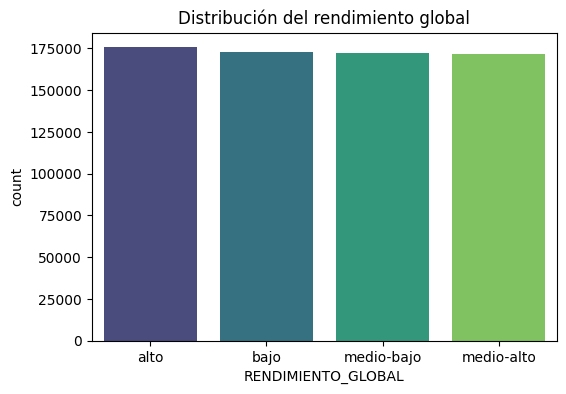

,proportion
RENDIMIENTO_GLOBAL,
alto,0.253601
bajo,0.249801
medio-bajo,0.248773
medio-alto,0.247825


In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.countplot(data=df, x="RENDIMIENTO_GLOBAL", order=df["RENDIMIENTO_GLOBAL"].value_counts().index, palette="viridis")
plt.title("Distribución del rendimiento global")
plt.show()

df["RENDIMIENTO_GLOBAL"].value_counts(normalize=True)


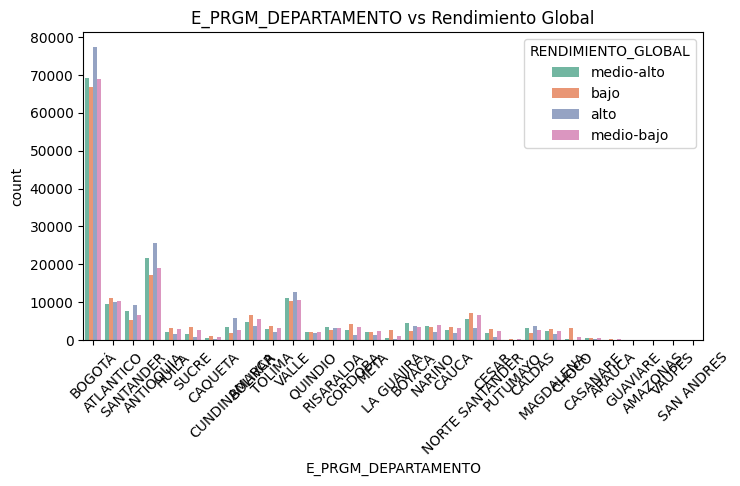

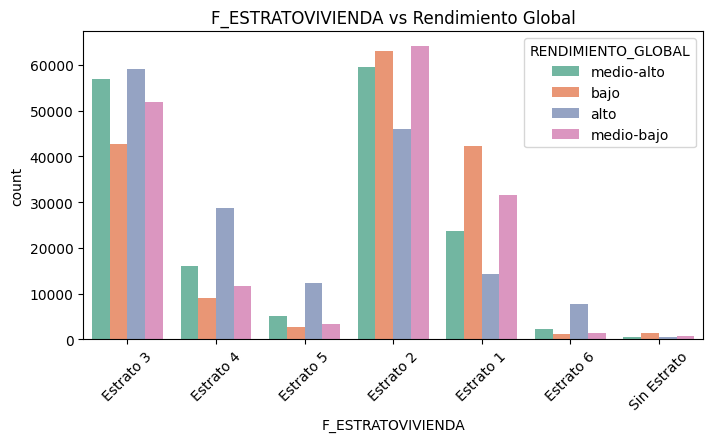

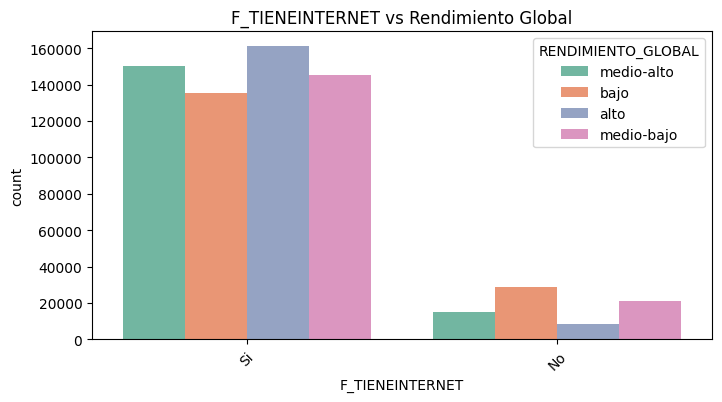

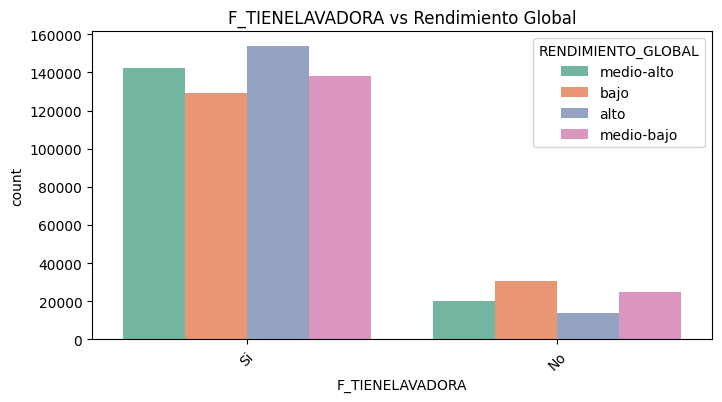

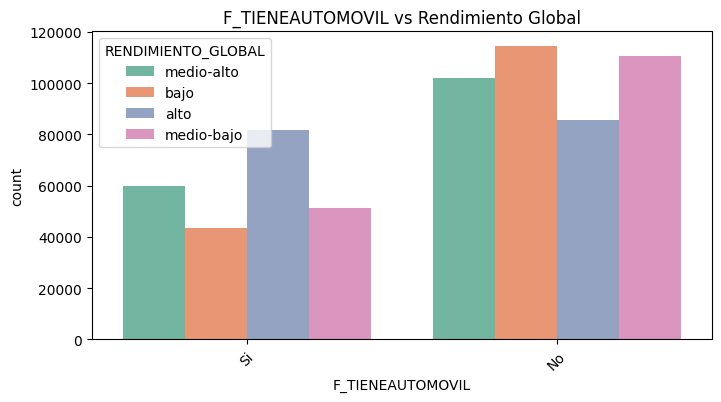

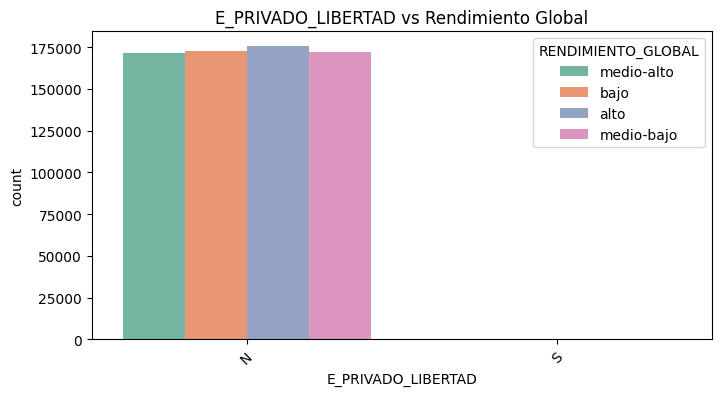

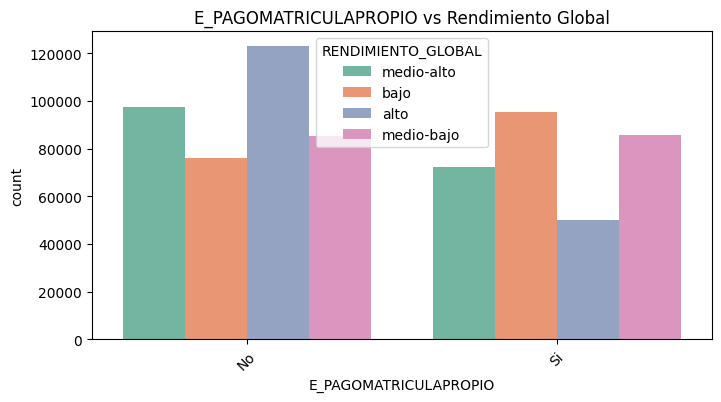

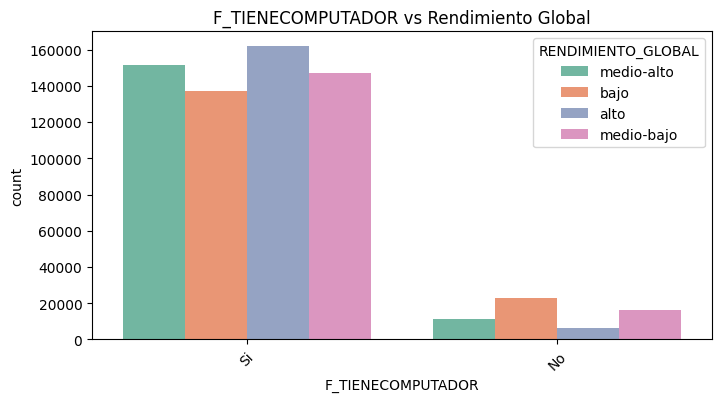

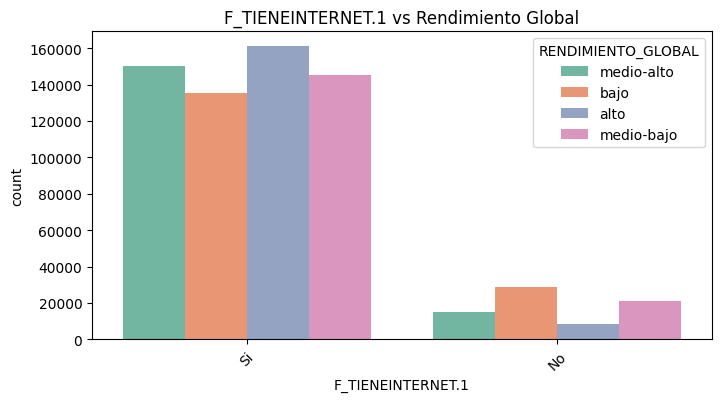

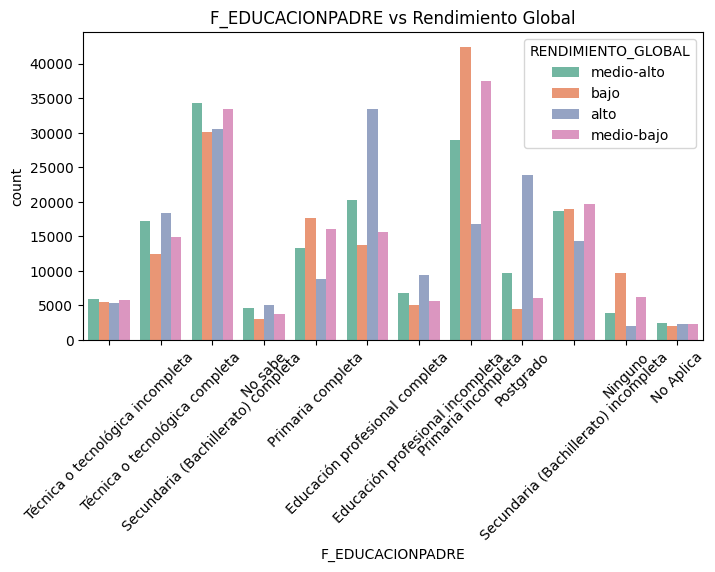

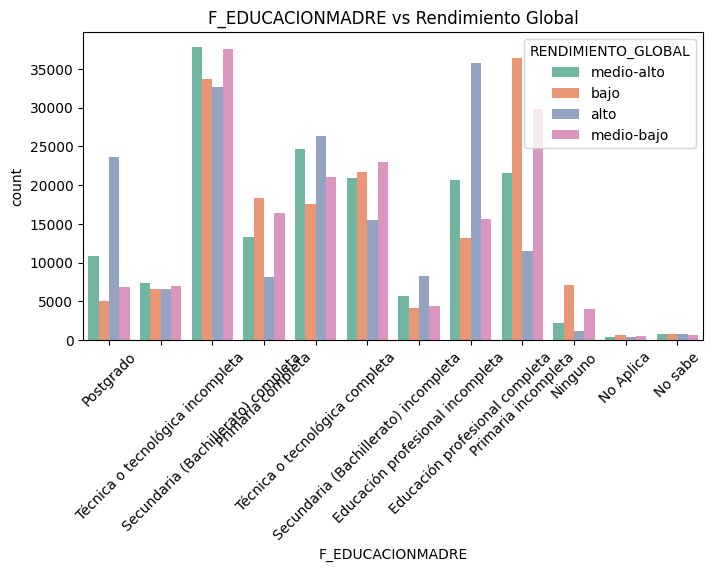

In [16]:
cat_cols = ["E_PRGM_DEPARTAMENTO", "F_ESTRATOVIVIENDA",
            "F_TIENEINTERNET", "F_TIENELAVADORA", "F_TIENEAUTOMOVIL",
            "E_PRIVADO_LIBERTAD", "E_PAGOMATRICULAPROPIO",
            "F_TIENECOMPUTADOR", "F_TIENEINTERNET.1",
            "F_EDUCACIONPADRE", "F_EDUCACIONMADRE"]

for col in cat_cols:
    plt.figure(figsize=(8,4))
    sns.countplot(data=df, x=col, hue="RENDIMIENTO_GLOBAL", palette="Set2")
    plt.title(f"{col} vs Rendimiento Global")
    plt.xticks(rotation=45)
    plt.show()


/tmp/ipython-input-1996557046.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="RENDIMIENTO_GLOBAL", y=col, palette="Set3")


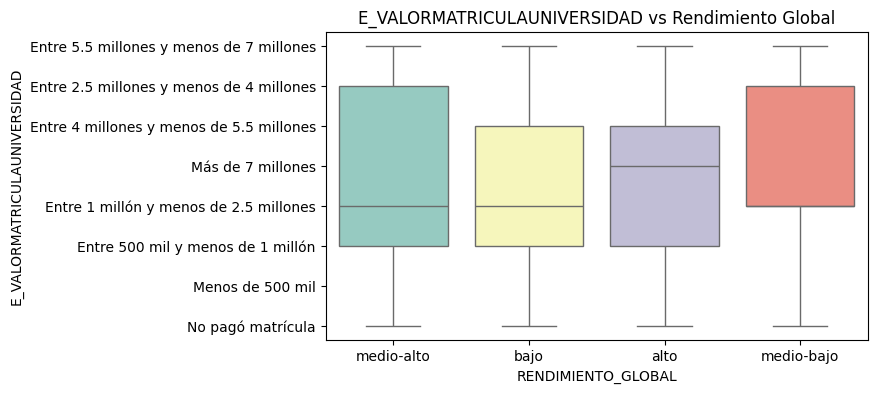

/tmp/ipython-input-1996557046.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="RENDIMIENTO_GLOBAL", y=col, palette="Set3")


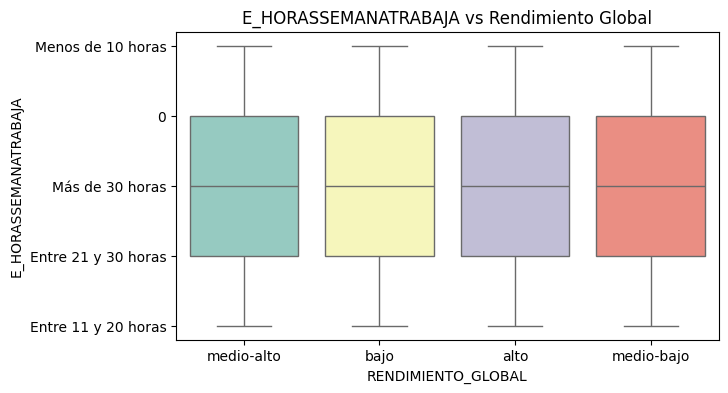

/tmp/ipython-input-1996557046.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="RENDIMIENTO_GLOBAL", y=col, palette="Set3")


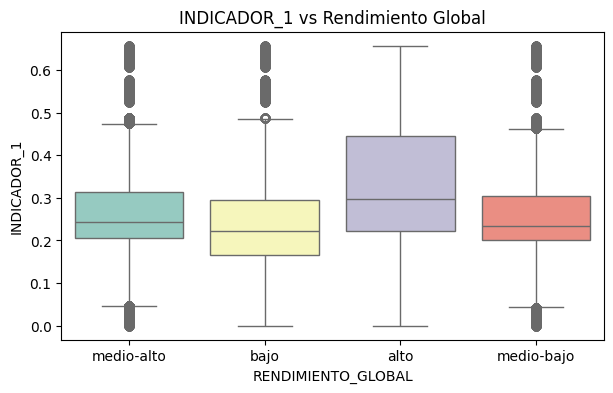

/tmp/ipython-input-1996557046.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="RENDIMIENTO_GLOBAL", y=col, palette="Set3")


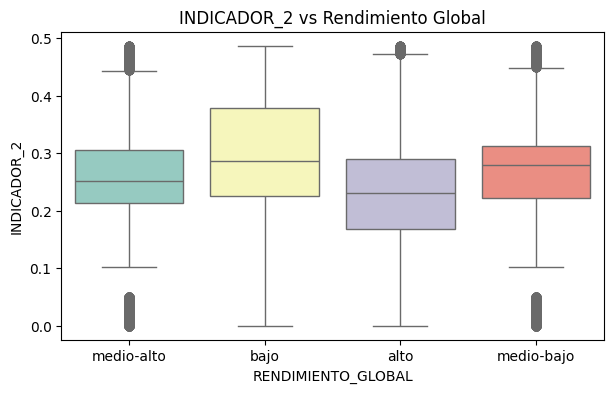

/tmp/ipython-input-1996557046.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="RENDIMIENTO_GLOBAL", y=col, palette="Set3")


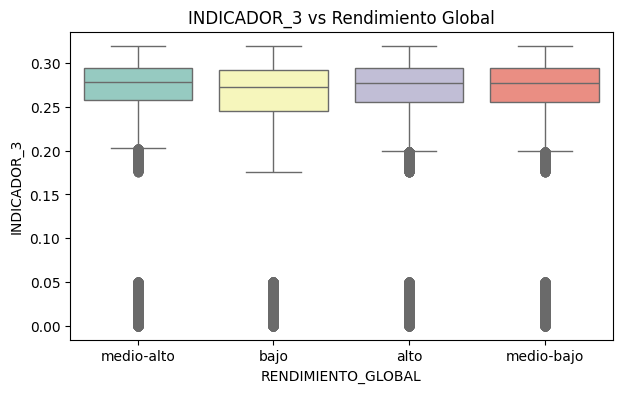

/tmp/ipython-input-1996557046.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="RENDIMIENTO_GLOBAL", y=col, palette="Set3")


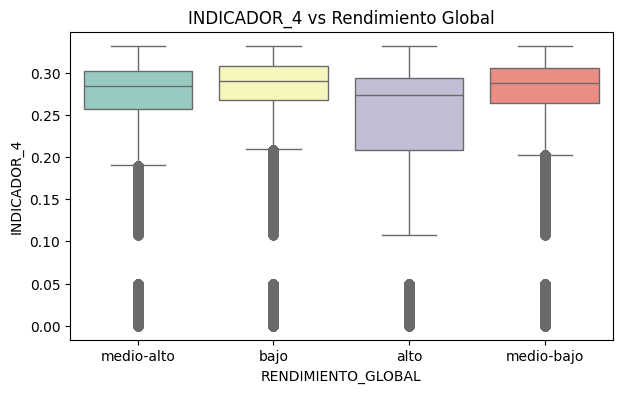

In [17]:
num_cols = ["E_VALORMATRICULAUNIVERSIDAD", "E_HORASSEMANATRABAJA",
            "INDICADOR_1", "INDICADOR_2", "INDICADOR_3", "INDICADOR_4"]

for col in num_cols:
    plt.figure(figsize=(7,4))
    sns.boxplot(data=df, x="RENDIMIENTO_GLOBAL", y=col, palette="Set3")
    plt.title(f"{col} vs Rendimiento Global")
    plt.show()

